# convert to text

In [2]:
!pip install -q pdfminer.six html2text beautifulsoup4


In [3]:
!pdf2txt.py -o seminar.pdf.html seminar.pdf


In [4]:
!python3 -c "import html2text, sys; print(html2text.html2text(open('seminar.pdf.html').read()))" > seminar.pdf.html.md


In [5]:
!git clone https://github.com/cca-cce/osm-cca-nlp.git


Cloning into 'osm-cca-nlp'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 25 (delta 8), reused 23 (delta 6), pack-reused 0 (from 0)
Receiving objects: 100% (25/25), 68.76 KiB | 1.38 MiB/s, done.
Resolving deltas: 100% (8/8), done.


please show me some python code for iterating over a collection of plain text documents, reading them into a pandas dataframe, cleaning the original text by removing any non-ascii characters

In [6]:
import os
import pandas as pd
import re

# Function to clean text by removing non-ASCII characters
def clean_text(text):
    # Remove non-ASCII characters.. will not work for swedish UTF8 text data
    cleaned_text = re.sub(r'[^\x00-\x7F]+', '', text)
    return cleaned_text

# Directory containing text files
directory_path = '/home/sol-nhl/rnd/d/quarto/osm-cca-nlp/res'
directory_path = '/content/osm-cca-nlp/res'

# Initialize an empty list to store the data
data = []

# Initialize a unique ID counter
unique_id = 1

# Iterate over the text files in the directory
for filename in os.listdir(directory_path):
    # Consider only plain text files
    if filename.endswith(".txt") or filename.endswith(".md"):
        file_path = os.path.join(directory_path, filename)

        # Read the file content
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()

        # Clean the text
        cleaned_text = clean_text(text)

        # Append the data as a dictionary with a unique ID
        data.append({
            'id': unique_id,
            'filename': filename,
            'original_text': text,
            'cleaned_text': cleaned_text
        })

        # Increment the unique ID
        unique_id += 1

# Create a Pandas DataFrame
text_df = pd.DataFrame(data)

# Save the DataFrame as a TSV file in the 'csv' subdirectory
output_file_path = '/home/sol-nhl/rnd/d/quarto/osm-cca-nlp/csv/text_data.tsv'
output_file_path = '/content/osm-cca-nlp/csv/text_data.tsv'

# Save the DataFrame to a TSV file
text_df.to_csv(output_file_path, sep='\t', index=False)

# Display the DataFrame
print(text_df)


   id             filename                                      original_text  \
0   1  seminar.pdf.html.md  Page 1\n\nThe Enactment of Inter-  \norganisat...   

                                        cleaned_text  
0  Page 1\n\nThe Enactment of Inter-  \norganisat...  


In [7]:
# Perform word count and character count on each cleaned text in the DataFrame
text_df['word_count'] = text_df['cleaned_text'].apply(lambda x: len(x.split()))
text_df['character_count'] = text_df['cleaned_text'].apply(lambda x: len(x))

# Select and print all columns except 'original_text' and 'cleaned_text'
columns_to_display = text_df.columns.difference(['original_text', 'cleaned_text'])
print(text_df[columns_to_display])


   character_count             filename  id  word_count
0           172137  seminar.pdf.html.md   1       24336


In [8]:
import spacy

# Load the spaCy model (small English model is used here)
nlp = spacy.load("en_core_web_sm")

# Perform word count and character count on each cleaned text in the DataFrame
text_df['word_count'] = text_df['cleaned_text'].apply(lambda x: len(x.split()))
text_df['character_count'] = text_df['cleaned_text'].apply(lambda x: len(x))

# Perform sentence count using spaCy
text_df['sentence_count'] = text_df['cleaned_text'].apply(lambda x: len(list(nlp(x).sents)))

# Select and print all columns except 'original_text' and 'cleaned_text'
columns_to_display = text_df.columns.difference(['original_text', 'cleaned_text'])
print(text_df[columns_to_display])


   character_count             filename  id  sentence_count  word_count
0           172137  seminar.pdf.html.md   1            1431       24336


ok now use spacy nlp to split the cleaned texts into individual sentences and put the original text id, sentence number, and sentence text into a new dataframe

In [9]:
import pandas as pd
import spacy
import os

# Load text_df from the TSV file
input_file_path = '/home/sol-nhl/rnd/d/quarto/osm-cca-nlp/csv/text_data.tsv'
input_file_path = '/content/osm-cca-nlp/csv/text_data.tsv'
text_df = pd.read_csv(input_file_path, sep='\t')

# Load the spaCy model (small English model is used here)
nlp = spacy.load("en_core_web_sm")

# Initialize an empty list to store sentence data
sentence_data = []

# Iterate over the cleaned text in the DataFrame
for index, row in text_df.iterrows():
    doc = nlp(row['cleaned_text'])  # Process the cleaned text with spaCy

    # Iterate over the sentences in the document
    for i, sentence in enumerate(doc.sents):
        sentence_data.append({
            'id': row['id'],           # Original text ID
            'sentence_number': i + 1,  # Sentence number (starting from 1)
            'sentence_text': sentence.text.strip()  # Sentence text
        })

# Create a new DataFrame with the sentence data
sentence_df = pd.DataFrame(sentence_data)

# Save the sentence_df DataFrame as a TSV file
output_file_path = '/home/sol-nhl/rnd/d/quarto/osm-cca-nlp/csv/sentence_data.tsv'
output_file_path = '/content/osm-cca-nlp/csv/sentence_data.tsv'
sentence_df.to_csv(output_file_path, sep='\t', index=False)

# Display the sentence DataFrame
print(sentence_df)


      id  sentence_number                                      sentence_text
0      1                1  Page 1\n\nThe Enactment of Inter-  \norganisat...
1      1                2  Candidate  \nDepartment of Strategic Communica...
2      1                3                                     PART I  \n\n1.
3      1                4  Point of departure: the phenomenon, the object...
4      1                5  The phenomenon: an introduction to collaborati...
...   ..              ...                                                ...
1426   1             1427  Journal of Applied  \nCommunication Research, ...
1427   1             1428  10.1080/00909882.2020.1837914  \n\nkerstrm, M....
1428   1             1429                               The meeting society.
1429   1             1430                                     Makadam Frlag.
1430   1             1431  62  \n\n  \n  \n  \n  \n  \n  \n\nPage: 1, 2, ...

[1431 rows x 3 columns]


In [10]:
sentence_df.sentence_text[147]

'Aspects of speech qualities in language, such as, rhythm and intonation, also\nplay an  \n\nimportant part in participants understanding one another in collaborative\nefforts.'

ok lets continue.. now use spacy nlp to analyze each sentence in sentence_df into individual word tokens, and put original text id and sentence number, along with token number, token text, token lemma, token part of speech, and token entity in a new dataframe called token_df

In [11]:
import pandas as pd
import spacy
import os

# Load sentence_df from the TSV file
input_file_path = '/home/sol-nhl/rnd/d/quarto/osm-cca-nlp/csv/sentence_data.tsv'
input_file_path = '/content/osm-cca-nlp/csv/sentence_data.tsv'
sentence_df = pd.read_csv(input_file_path, sep='\t')

# Load the spaCy model (small English model is used here)
nlp = spacy.load("en_core_web_sm")

# Initialize an empty list to store token data
token_data = []

# Iterate over the sentences in the sentence_df DataFrame
for index, row in sentence_df.iterrows():
    doc = nlp(row['sentence_text'])  # Process the sentence text with spaCy

    # Iterate over the tokens in the sentence
    for j, token in enumerate(doc):
        token_data.append({
            'id': row['id'],                    # Original text ID
            'sentence_number': row['sentence_number'],  # Sentence number
            'token_number': j + 1,              # Token number (starting from 1)
            'token_text': token.text,           # Token text
            'token_lemma': token.lemma_,        # Token lemma
            'token_pos': token.pos_,            # Token part of speech
            'token_entity': token.ent_type_     # Token entity type (if any)
        })

# Create a new DataFrame with the token data
token_df = pd.DataFrame(token_data)

# Save the token_df DataFrame as a TSV file
output_file_path = '/home/sol-nhl/rnd/d/quarto/osm-cca-nlp/csv/token_data.tsv'
output_file_path = '/content/osm-cca-nlp/csv/token_data.tsv'
token_df.to_csv(output_file_path, sep='\t', index=False)

# Display the token DataFrame
print(token_df)


       id  sentence_number  token_number token_text token_lemma token_pos  \
0       1                1             1       Page        page      NOUN   
1       1                1             2          1           1       NUM   
2       1                1             3       \n\n        \n\n     SPACE   
3       1                1             4        The         the       DET   
4       1                1             5  Enactment   Enactment     PROPN   
...    ..              ...           ...        ...         ...       ...   
32712   1             1431           128         61          61       NUM   
32713   1             1431           129          ,           ,     PUNCT   
32714   1             1431           130         62          62       NUM   
32715   1             1431           131          ,           ,     PUNCT   
32716   1             1431           132         63          63       NUM   

      token_entity  
0           PERSON  
1           PERSON  
2           

super ! now lets start on a new code chunk and create a new dataframe by getting the lemma of all tokens where part of speech is noun, and then aggregate the count of each unique lemma, and use seaborn to plot the 20 most frequent words

<ipython-input-12-a8a1485fea73>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='lemma', data=top_lemmas, palette='viridis')


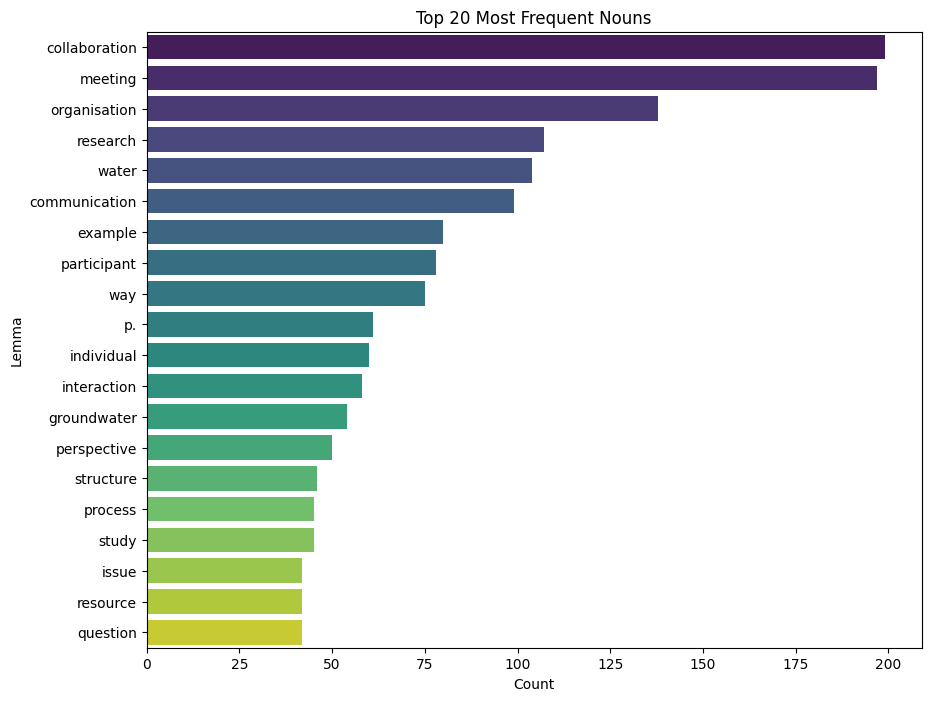

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Load token_df from the TSV file
input_file_path = '/home/sol-nhl/rnd/d/quarto/osm-cca-nlp/csv/token_data.tsv'
input_file_path = '/content/osm-cca-nlp/csv/token_data.tsv'
token_df = pd.read_csv(input_file_path, sep='\t')

# Filter the DataFrame to keep only rows where the part of speech is 'NOUN'
noun_df = token_df[token_df['token_pos'] == 'NOUN']

# Group by the lemma and count the occurrences of each lemma
lemma_counts = noun_df['token_lemma'].value_counts().reset_index()

# Rename the columns for clarity
lemma_counts.columns = ['lemma', 'count']

# Get the 20 most frequent lemmas
top_lemmas = lemma_counts.head(20)

# Plot the 20 most frequent nouns using Seaborn
plt.figure(figsize=(10, 8))
sns.barplot(x='count', y='lemma', data=top_lemmas, palette='viridis')
plt.title('Top 20 Most Frequent Nouns')
plt.xlabel('Count')
plt.ylabel('Lemma')

# Save the figure to a PNG file
output_file_path = '/home/sol-nhl/rnd/d/quarto/osm-cca-nlp/fig/token_noun.png'
output_file_path = '/content/osm-cca-nlp/fig/token_noun.png'
plt.savefig(output_file_path)

# Display the plot
plt.show()


great ! in a new code chunk please create a new dataframe by extracting all token entities that are not empty, aggregate unique entities by count, and use seaborn to create a frequency diagram of the 20 most common entities

<ipython-input-14-87f60324460a>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='entity', data=top_entities, palette='magma')


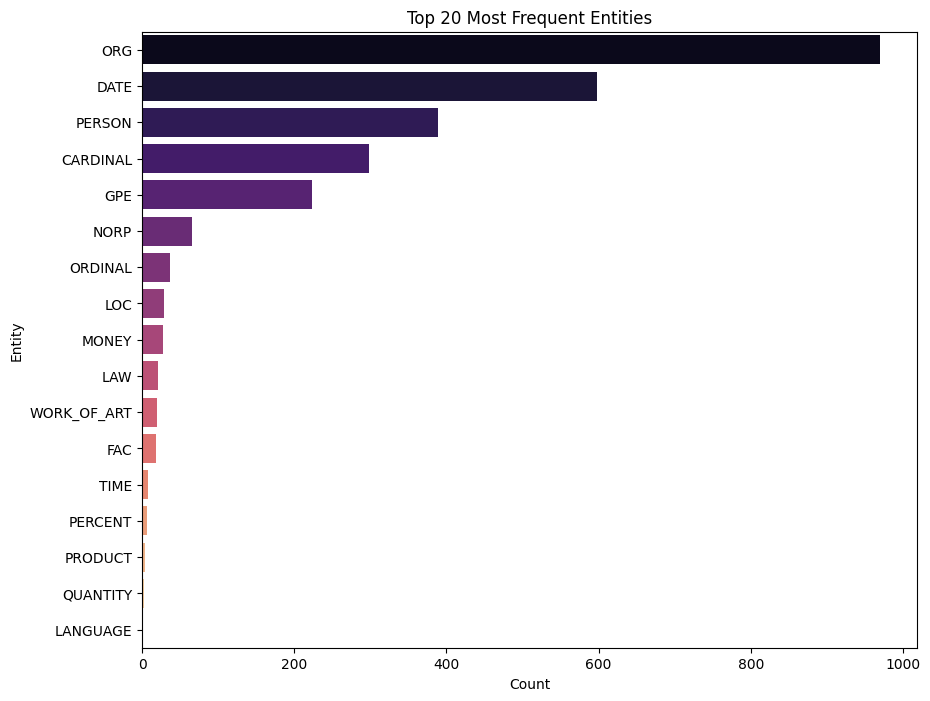

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming token_df is already available from the previous steps

# Filter the DataFrame to keep only rows where token_entity is not empty
entity_df = token_df[token_df['token_entity'] != '']

# Group by the entity type and count the occurrences of each entity
entity_counts = entity_df['token_entity'].value_counts().reset_index()

# Rename the columns for clarity
entity_counts.columns = ['entity', 'count']

# Get the 20 most frequent entities
top_entities = entity_counts.head(20)

# Plot the 20 most frequent entities using Seaborn
plt.figure(figsize=(10, 8))
sns.barplot(x='count', y='entity', data=top_entities, palette='magma')
plt.title('Top 20 Most Frequent Entities')
plt.xlabel('Count')
plt.ylabel('Entity')
plt.show()


lets try that again.. in a new code chunk create a dataframe by finding all token lemmas where entity type is ORG or MONEY or CARDINAL, aggregate lemmas by counting unique items, and use seaborn to plot a frequency diagram of top 20 entities where labels are color coded by entity type

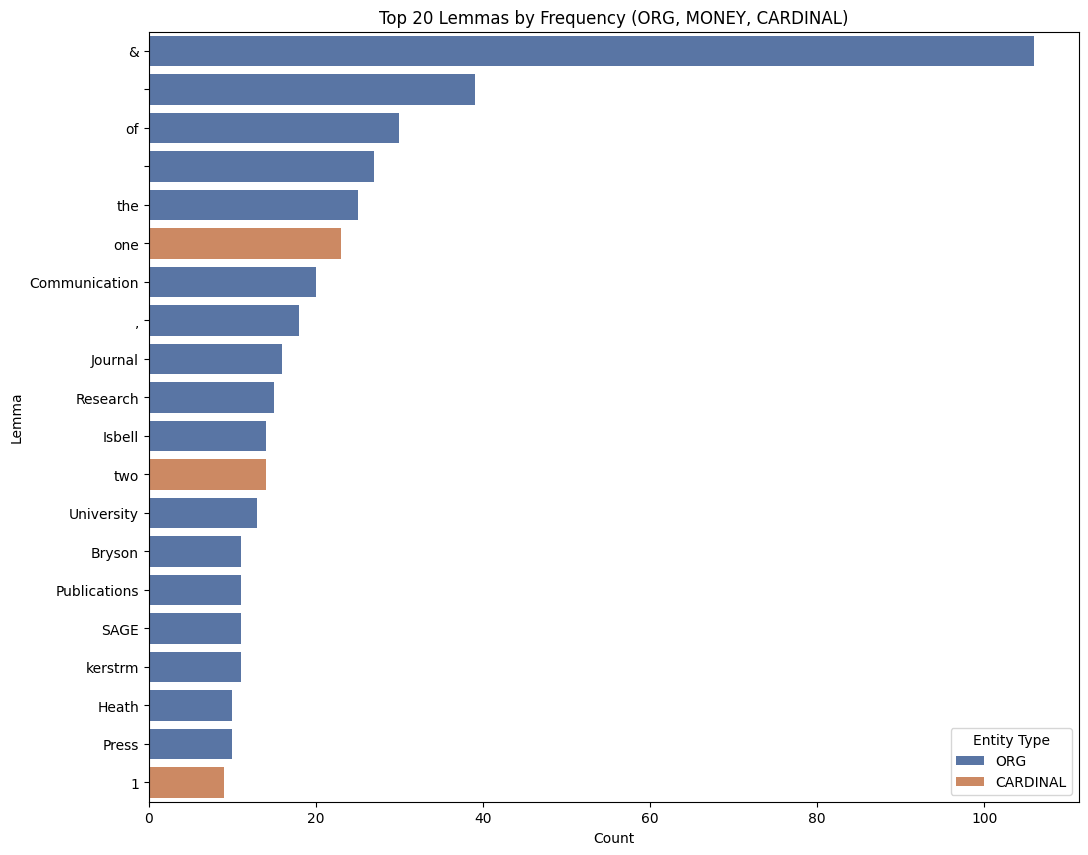

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming token_df is already available from the previous steps

# Filter tokens where entity type is ORG, MONEY, or CARDINAL
filtered_df = token_df[token_df['token_entity'].isin(['ORG', 'MONEY', 'CARDINAL'])]

# Group by lemma and entity type, and count occurrences
lemma_entity_counts = filtered_df.groupby(['token_lemma', 'token_entity']).size().reset_index(name='count')

# Sort by count and get the top 20 most frequent lemmas
top_lemmas_entities = lemma_entity_counts.nlargest(20, 'count')

# Plot the top 20 most frequent lemmas with color-coded entity types using Seaborn
plt.figure(figsize=(12, 10))
sns.barplot(x='count', y='token_lemma', hue='token_entity', data=top_lemmas_entities, palette='deep')
plt.title('Top 20 Lemmas by Frequency (ORG, MONEY, CARDINAL)')
plt.xlabel('Count')
plt.ylabel('Lemma')
plt.legend(title='Entity Type')
plt.show()


# convert to text

In [ ]:
#!pip install pdfminer.six html2text
!pip install pdfminer.six html2text beautifulsoup4


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 57.7 MB/s eta 0:00:00
  Created wheel for html2text: filename=html2text-2024.2.26-py3-none-any.whl size=33111 sha256=6ae14aae84b5bcdf0a01fa36cad982e8d80455d0fb48cc326ee0c5cb488b07de
  Stored in directory: /root/.cache/pip/wheels/f3/96/6d/a7eba8f80d31cbd188a2787b81514d82fc5ae6943c44777659
Successfully built html2text


# on windows..

In [ ]:
!python C:\Users\nilsh\Documents\venv-nlp\Scripts\pdf2txt.py -o seminar.pdf.html seminar.pdf

# on linux

In [ ]:
!pdf2txt.py -o pdf/strategy-sustainable-development-lund-university-2019-2026.pdf.html pdf/strategy-sustainable-development-lund-university-2019-2026.pdf


In [ ]:
!python3 -c "import html2text, sys; print(html2text.html2text(open('pdf/strategy-sustainable-development-lund-university-2019-2026.pdf.html').read()))" > pdf/strategy-sustainable-development-lund-university-2019-2026.pdf.html.md


# minimal html to md

In [ ]:
!python3 -c "import html2text, sys; from bs4 import BeautifulSoup; html = open('xml/lu-sustainability-communication-01.html').read(); soup = BeautifulSoup(html, 'html.parser'); [s.extract() for s in soup(['nav', 'header', 'footer'])]; print(html2text.html2text(str(soup)))" > xml/lu-sustainability-communication-01-min.md


# initial testing

In [ ]:
!pip install PyPDF2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 6.1 MB/s eta 0:00:00


In [ ]:
import os
from pathlib import Path
from PyPDF2 import PdfReader

# Specify the directory containing the PDF files
pdf_directory = '/content/pdf'
output_directory = '/content/txt'

# Ensure the output directory exists
os.makedirs(output_directory, exist_ok=True)

# Iterate over each PDF file in the directory
for pdf_file in Path(pdf_directory).glob('*.pdf'):
    # Open the PDF file
    reader = PdfReader(str(pdf_file))

    # Extract text from each page and combine it
    text = ''
    for page in reader.pages:
        text += page.extract_text()

    # Define the output .txt file path
    output_file = os.path.join(output_directory, pdf_file.stem + '.txt')

    # Save the extracted text to a .txt file
    with open(output_file, 'w', encoding='utf-8') as txt_file:
        txt_file.write(text)

    print(f'Saved: {output_file}')


Saved: /content/txt/lu-sustainability-communication-01.txt
Saved: /content/txt/lu-sustainability-communication-02.txt


In [ ]:
import os
import pandas as pd

# Specify the directory containing the text files
text_files_directory = '/content/txt'

# Initialize an empty list to store the data
data = []

# Iterate over each text file in the directory
for filename in os.listdir(text_files_directory):
    if filename.endswith('.txt'):
        filepath = os.path.join(text_files_directory, filename)

        # Read the content of the text file
        with open(filepath, 'r', encoding='utf-8') as file:
            content = file.read()

        # Append the filename and content to the data list
        data.append([filename, content])

# Create a DataFrame from the data
df = pd.DataFrame(data, columns=['Filename', 'Content'])

# Display the DataFrame
print(df)


                                 Filename  \
0  lu-sustainability-communication-01.txt   
1  lu-sustainability-communication-02.txt   

                                             Content  
0  Swedish website Search\nMenu\nStart ›About ...  
1  Swedish website Search\nMenu\nStart ›About ...  


In [ ]:
import pandas as pd
import re

# Function to clean text content
def clean_text(text):
    # Use regular expression to find all words consisting only of ASCII characters
    cleaned_text = ' '.join(re.findall(r'\b[a-zA-Z]+\b', text))
    return cleaned_text

# Assuming 'df' is your DataFrame with 'Filename' and 'Content' columns
# Create a new column 'Clean' by applying the clean_text function to each row in 'Content'
df['Clean'] = df['Content'].apply(clean_text)

# Display the DataFrame with the new 'Clean' column
print(df[['Filename', 'Content', 'Clean']])


                                 Filename  \
0  lu-sustainability-communication-01.txt   
1  lu-sustainability-communication-02.txt   

                                             Content  \
0  Swedish website Search\nMenu\nStart ›About ...   
1  Swedish website Search\nMenu\nStart ›About ...   

                                               Clean  
0  Swedish website Search Menu Start About the Un...  
1  Swedish website Search Menu Start About the Un...  


In [ ]:
import pandas as pd
import re

# Function to clean text content
def clean_text(text):
    # Use regular expression to find all words consisting of ASCII characters, numbers, and punctuation
    cleaned_text = ' '.join(re.findall(r'\b[a-zA-Z0-9.,!?\'"-]+\b', text))
    return cleaned_text

# Assuming 'df' is your DataFrame with 'Filename' and 'Content' columns
# Create a new column 'Clean' by applying the clean_text function to each row in 'Content'
df['Clean'] = df['Content'].apply(clean_text)

# Display the DataFrame with the new 'Clean' column
print(df[['Filename', 'Content', 'Clean']])


                                 Filename  \
0  lu-sustainability-communication-01.txt   
1  lu-sustainability-communication-02.txt   

                                             Content  \
0  Swedish website Search\nMenu\nStart ›About ...   
1  Swedish website Search\nMenu\nStart ›About ...   

                                               Clean  
0  Swedish website Search Menu Start About the Un...  
1  Swedish website Search Menu Start About the Un...  


In [ ]:
import pandas as pd
import re

# Function to split text into sentences
def split_into_sentences(text):
    # Use regular expression to split text into sentences
    sentences = re.split(r'(?<=[.!?])\s+', text)
    return sentences

# Assuming 'df' is your DataFrame with 'Filename' and 'Clean' columns
# Initialize a list to store the sentence data
sentence_data = []

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    filename = row['Filename']
    clean_text = row['Clean']

    # Split the clean text into sentences
    sentences = split_into_sentences(clean_text)

    # Iterate over each sentence and store the filename, sentence number, and sentence text
    for i, sentence in enumerate(sentences):
        sentence_data.append([filename, i + 1, sentence])

# Create a new DataFrame from the sentence data
sentence_df = pd.DataFrame(sentence_data, columns=['Filename', 'Sentence_Number', 'Sentence_Text'])

# Display the new DataFrame
print(sentence_df)


                                 Filename  Sentence_Number  \
0  lu-sustainability-communication-01.txt                1   
1  lu-sustainability-communication-02.txt                1   

                                       Sentence_Text  
0  Swedish website Search Menu Start About the Un...  
1  Swedish website Search Menu Start About the Un...  


In [ ]:
print(df.Content[0])

Swedish website Search
Menu
Start ›About the University ›The University at a glance ›Mission, vision and values
›Sustainability
Sustainability
One of the most sustainable universities in the world
 På svenska
Ranked 8th in the world in the QS Sustainability Rankings
2024, Lund University is a global leader in sustainability in
higher education. This encourages us to continue leading the
way towards a sustainable society in our research, educationSustainability | Lund University https://www.lunduniversity.lu.se/about-university/universi...
1 of 9 8/16/24, 15:34and everyday life.
Sustainability is a complex area that requires interdisciplinary research, education and
external engagement. The University o�ers a range of courses and programmes, and is
part of networks and collaborations linked to the sustainability goals outlined in the
2030 Agenda.
Lund University ranks in top 10 in global sustainability ranking (5 December 2023)
Global goals for sustainable development – globalgoals.

In [ ]:
print(df.Clean[0])

Swedish website Search Menu Start About the University The University at a glance Mission vision and values Sustainability Sustainability One of the most sustainable universities in the world svenska Ranked 8th in the world in the QS Sustainability Rankings 2024 Lund University is a global leader in sustainability in higher education This encourages us to continue leading the way towards a sustainable society in our research educationSustainability Lund University https www.lunduniversity.lu.se about-university universi 1 of 9 8 16 24 15 34and everyday life Sustainability is a complex area that requires interdisciplinary research education and external engagement The University o ers a range of courses and programmes and is part of networks and collaborations linked to the sustainability goals outlined in the 2030 Agenda Lund University ranks in top 10 in global sustainability ranking 5 December 2023 Global goals for sustainable development globalgoals.org Education Our courses and pro

In [ ]:
!rm *.png *.html

In [ ]:
!pdftohtml -noframes lu-sustainability-communication-01.pdf lu-sustainability-communication-01.html


Page-1
Page-2
Page-3
Page-4
Page-5
Page-6
Page-7
Page-8
Page-9


In [ ]:
!sudo apt-get install poppler-utils


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.5 [186 kB]
Fetched 186 kB in 1s (192 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package poppler-utils.
(Reading database ... 123595 

In [ ]:
!pdfimages -png lu-sustainability-communication-01.pdf image_prefix


In [ ]:
!sudo apt install imagemagick

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript gsfonts
  imagemagick-6-common imagemagick-6.q16 libdjvulibre-text libdjvulibre21
  libfftw3-double3 libgs9 libgs9-common libidn12 libijs-0.35 libjbig2dec0
  libjxr-tools libjxr0 liblqr-1-0 libmagickcore-6.q16-6
  libmagickcore-6.q16-6-extra libmagickwand-6.q16-6 libnetpbm10
  libwmflite-0.2-7 netpbm poppler-data
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre
  ghostscript-x imagemagick-doc autotrace cups-bsd | lpr | lprng enscript gimp
  gnuplot grads hp2xx html2ps libwmf-bin mplayer povray radiance sane-utils
  texlive-base-bin transfig ufraw-batch libfftw3-bin libfftw3-dev inkscape
  poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fonts-arphic-ukai
  fonts-arphic-uming fon

In [ ]:
!convert -density 300 /content/lu-sustainability-communication-01.pdf page-%03d.png


convert-im6.q16: attempt to perform an operation not allowed by the security policy `PDF' @ error/constitute.c/IsCoderAuthorized/426.
convert-im6.q16: no images defined `page-%03d.png' @ error/convert.c/ConvertImageCommand/3229.
